In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import r2_score

## Step1:Import,Info,Discribe

In [84]:
new=pd.read_csv(r"C:\Users\HP\Downloads\Marketing_Data.csv")
new

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


In [85]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [86]:
new.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## Step2: boxplot,Ottlier,Boxplot

<AxesSubplot:>

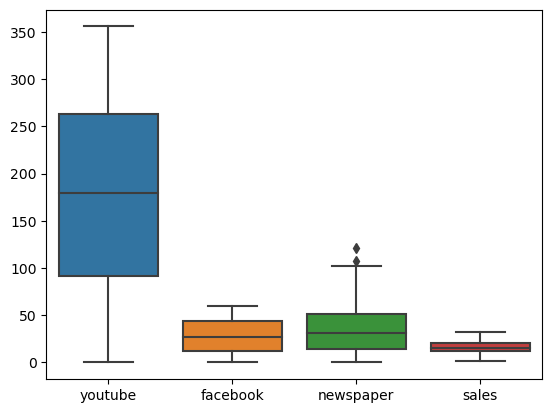

In [87]:
sns.boxplot(data=new)

In [88]:
q1=new['newspaper'].quantile(0.25)
q3=new['newspaper'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
upper_limit

106.59

In [89]:
new ['newspaper']=np.where(new['newspaper'] > upper_limit,upper_limit,new['newspaper'])

<AxesSubplot:>

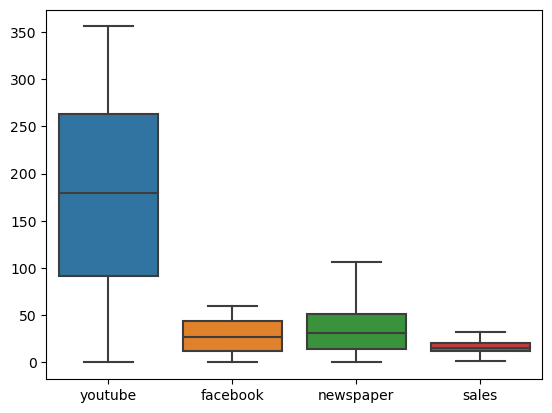

In [90]:
sns.boxplot(data=new)

## Step3:Head ,seprat Train and Test.

In [91]:
new.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [92]:
x=new.drop('sales',axis=1)
y=new[['sales']]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=110)


In [93]:
df=pd.concat([y_train,x_train],axis=1)
df.head()

,sales,youtube,facebook,newspaper
108,24.96,328.44,34.68,71.64
142,17.40,197.40,25.08,56.88
17,12.72,107.64,11.88,42.84
36,11.16,82.80,11.16,1.08
116,12.36,168.36,2.28,10.80


## Step4:Scatter,Corr,VIF,Assumption 

<AxesSubplot:title={'center':'sales vs youtube'}, xlabel='youtube', ylabel='sales'>

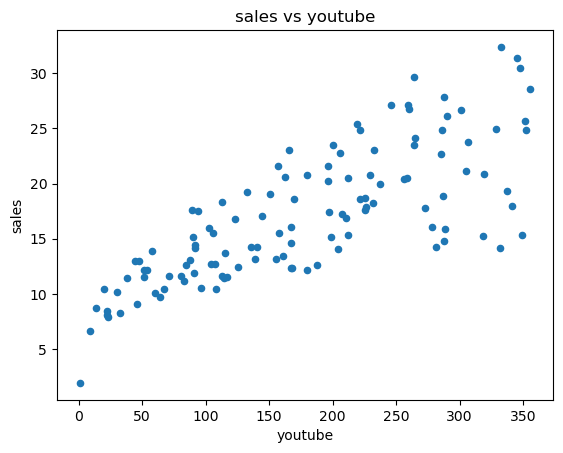

In [94]:
df.plot.scatter(x='youtube',y='sales',title='sales vs youtube')

In [95]:
df.corr()

,sales,youtube,facebook,newspaper
sales,1.000000,0.775557,0.607253,0.185457
youtube,0.775557,1.000000,0.089242,0.048402
facebook,0.607253,0.089242,1.000000,0.293933
newspaper,0.185457,0.048402,0.293933,1.000000


<AxesSubplot:>

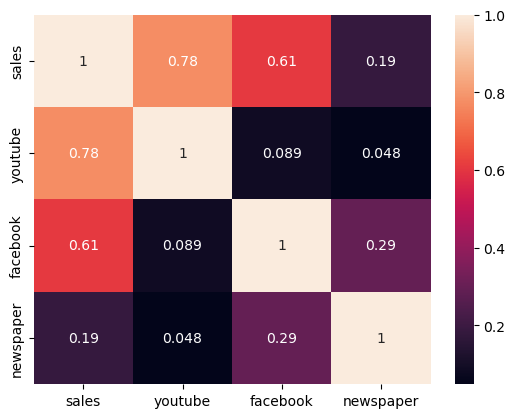

In [96]:
sns.heatmap(df.corr(),annot=True)  # annot=give the no inside of box

### youtube have 78% strong positve correlation with Sales
.youtube have high impact on Sales

.There is no colinearity in data, So every platform is independent

In [50]:
x=df.drop(['sales'],axis=1)
before=pd.Series([variance_inflation_factor(x.values, i) 
                           for i in range(x.shape[1])],  # i=0,1,2
                          index=x.columns)
before

youtube      2.679076
facebook     3.242223
newspaper    2.851359
dtype: float64

### MODEL BULDING
H0:There is no linear relationship  between sales and youtube,newspaper,facebook

    vs
    
H1:There is linear relastionship between sales and  youtube,newspaper,facebook

Alpha=5%

In [55]:
model=smf.ols('sales~youtube+facebook+newspaper',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     321.2
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           1.02e-55
Time:                        22:51:56   Log-Likelihood:                -247.82
No. Observations:                 119   AIC:                             503.6
Df Residuals:                     115   BIC:                             514.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1316      0.486      8.497      0.000       3.168       5.095
youtube        0.0441      0.002     23.788      0.000       0.040       0.048
facebook       0.1863      0.011     17.065      0.000       0.165       0.208
newspaper     -0.0023      0.007     -0.315      0.754      -0.017       0.012
==============================================================================
Omnibus:                       73.440   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.846
Skew:                          -2.102   Prob(JB):                     6.70e-87
Kurtosis:                      10.897   Cond. No.                         555.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### .There is Linear relationship between sales and youtube , facebook
.There is no Linear relationship between sales and NewsPaper

.so we will remove and re-run the model


In [60]:
model2=smf.ols("sales~youtube+facebook",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     485.6
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           4.30e-57
Time:                        22:56:11   Log-Likelihood:                -247.87
No. Observations:                 119   AIC:                             501.7
Df Residuals:                     116   BIC:                             510.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0782      0.454      8.986      0.000       3.179       4.977
youtube        0.0440      0.002     23.880      0.000       0.040       0.048
facebook       0.1853      0.010     17.811      0.000       0.165       0.206
==============================================================================
Omnibus:                       72.242   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.719
Skew:                          -2.076   Prob(JB):                     1.57e-82
Kurtosis:                      10.664   Cond. No.                         514.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### .There is Linear relationship between sales and youtube , facebook
    
 .91% is accuracy of model , so we say model is good fit   

In [62]:
X1=df.loc[:,['youtube', 'facebook']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

youtube     2.402871
facebook    2.402871
dtype: float64

## Assumption

In [63]:
df.head()

,sales,youtube,facebook,newspaper
108,24.96,328.44,34.68,71.64
142,17.40,197.40,25.08,56.88
17,12.72,107.64,11.88,42.84
36,11.16,82.80,11.16,1.08
116,12.36,168.36,2.28,10.80


In [64]:
Y = 4.0782 + 0.0440 * 328.44  + 0.1853 * 34.68
Y

24.955764

In [117]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,sales,youtube,facebook,newspaper,fitted_value,residual
108,24.96,328.44,34.68,71.64,24.969153,-0.009153
142,17.40,197.40,25.08,56.88,17.419071,-0.019071
17,12.72,107.64,11.88,42.84,11.020092,1.699908
36,11.16,82.80,11.16,1.08,9.792660,1.367340
116,12.36,168.36,2.28,10.80,11.915728,0.444272


## Linearity

<AxesSubplot:title={'center':'sales vs youtube'}, xlabel='youtube', ylabel='sales'>

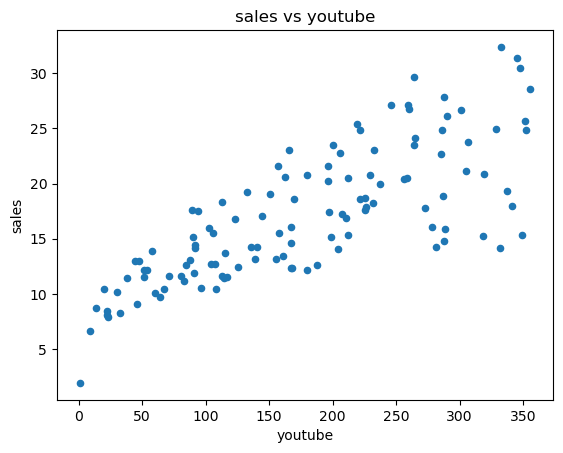

In [67]:
df.plot.scatter(x='youtube',y='sales',title='sales vs youtube')


### Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

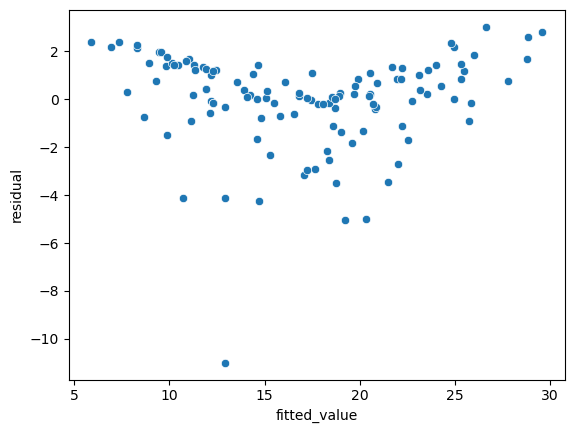

In [68]:
sns.scatterplot(x='fitted_value',y='residual',data=df)

## Normality

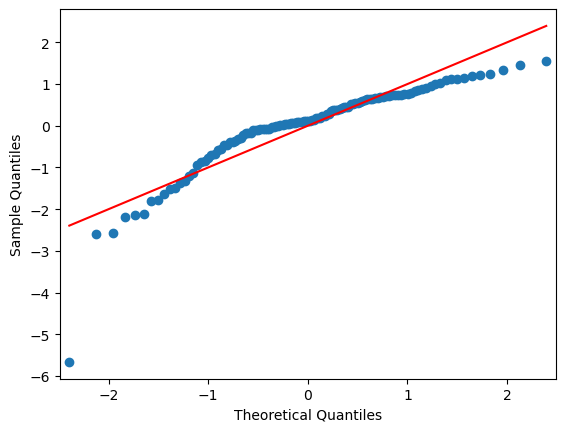

In [77]:
fig=sm.qqplot(df['residual'],fit=True,line='s')

## Model Error are IID(independent)

<AxesSubplot:ylabel='Frequency'>

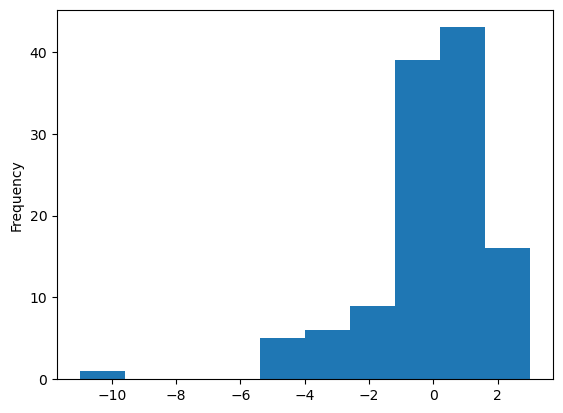

In [79]:
df['residual'].plot.hist()

### Step5:Prediction on Test Data (unseen data)

In [107]:
df_test=pd.concat([x_test,y_test],axis=1)
df_test.head()

,youtube,facebook,newspaper,sales
95,275.40,38.76,89.04,23.64
63,261.24,40.20,70.80,23.28
144,202.08,8.52,15.36,14.04
169,340.32,50.40,79.44,30.60
41,238.92,36.72,46.44,21.96


In [108]:
df_test['Prediction']=model2.predict(df_test) 
df_test.head()

,youtube,facebook,newspaper,sales,Prediction
95,275.40,38.76,89.04,23.64,23.389036
63,261.24,40.20,70.80,23.28,23.032185
144,202.08,8.52,15.36,14.04,14.556996
169,340.32,50.40,79.44,30.60,28.404950
41,238.92,36.72,46.44,21.96,21.404375


In [109]:
Y = 4.0782 + 0.0440 * 275.40 + 0.1853 * 38.76  # one row prediction ( Manual)
Y

23.378027999999997

## Test

In [111]:
r2 = r2_score(df_test.sales, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.91


### Train

In [118]:
r2 = r2_score(df.sales, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.89


### Prediction for Live Data -- Population

In [121]:
d1 = {'Customer':pd.Series(['Apurva','Shivani','Jiya']),
      'youtube'      :pd.Series([93.9,73.5,200]),
      'facebook'   :pd.Series([43.5,18,35]),
      'newspaper':pd.Series([50.5,13,24]),
     }
live = pd.DataFrame(d1)
live

,Customer,youtube,facebook,newspaper
0,Apurva,93.9,43.5,50.5
1,Shivani,73.5,18.0,13.0
2,Jiya,200.0,35.0,24.0


In [122]:
live['future Prediction']=np.round(model.predict(live),2)
live

,Customer,youtube,facebook,newspaper,future Prediction
0,Apurva,93.9,43.5,50.5,16.25
1,Shivani,73.5,18.0,13.0,10.69
2,Jiya,200.0,35.0,24.0,19.41
